In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline




In [2]:
# Example dataset
data = {
    "Question": [
        "What is Rhapsody?",
        "How do I create a new project in Rhapsody?",
        "What are the benefits of using Rhapsody?",
        "How to generate code from a model in Rhapsody?"
    ],
    "Answer": [
        "Rhapsody is a visual modeling tool for designing complex systems.",
        "To create a new project in Rhapsody, go to File > New Project and follow the wizard.",
        "The benefits of using Rhapsody include model-based design, collaboration features, and code generation.",
        "To generate code, click on Tools > Generate Code and select the model elements."
    ]
}

df = pd.DataFrame(data)



In [3]:
# Tokenize and vectorize questions
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Question"])

# Define a function to find the closest match
def find_closest_question(user_input):
    user_tfidf = vectorizer.transform([user_input])
    cosine_similarities = cosine_similarity(user_tfidf, tfidf_matrix).flatten()
    best_match_idx = cosine_similarities.argmax()
    return df["Answer"][best_match_idx]

# Test the chatbot
user_query = "How do I start a new project?"
print(find_closest_question(user_query))


To create a new project in Rhapsody, go to File > New Project and follow the wizard.


C:\Users\uig97558\AppData\Local\Temp\ipykernel_14564\2258565850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Question"], palette="viridis")


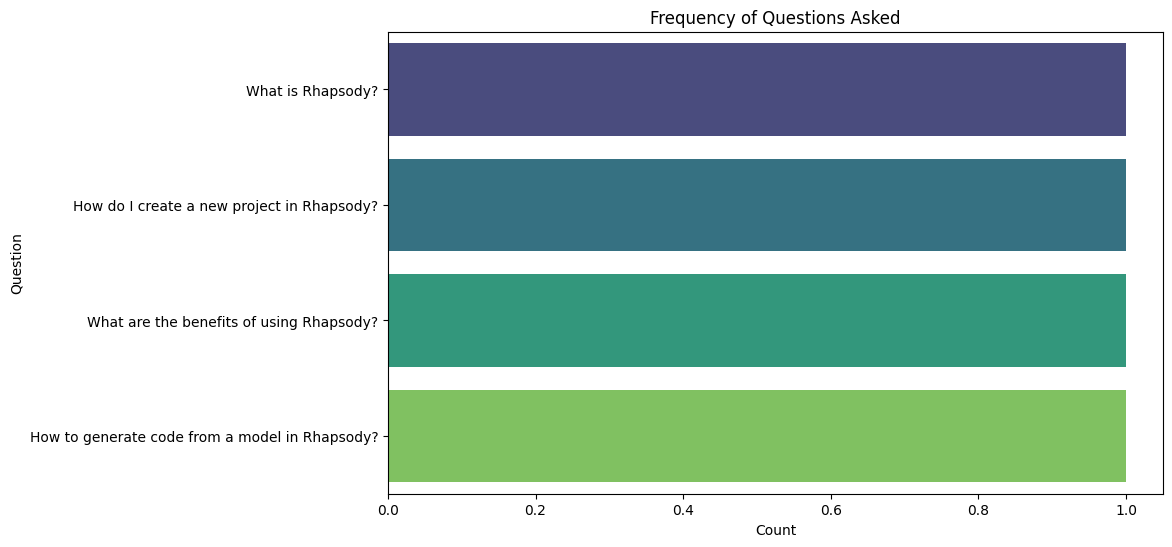

In [4]:
# Example visualization: Plot the frequency of questions
plt.figure(figsize=(10, 6))
sns.countplot(y=df["Question"], palette="viridis")
plt.title("Frequency of Questions Asked")
plt.xlabel("Count")
plt.ylabel("Question")
plt.show()


In [5]:
# Using a pretrained model
qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")

# Function to answer questions
def answer_question(question, context):
    return qa_pipeline({"question": question, "context": context})['answer']

# Provide context from your dataset
context = " ".join(df["Answer"])
print(answer_question("What is Rhapsody?", context))


config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

D:\python_place\Python311\Python311\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\uig97558\.cache\huggingface\hub\models--distilbert-base-uncased-distilled-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForQuestionAnswering.

All the weights of TFDistilBertForQuestionAnswering were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

D:\python_place\Python311\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


a visual modeling tool for designing complex systems


In [6]:
!pip install streamlit

# Create a new Python script (e.g., chatbot.py) with Streamlit code
import streamlit as st

st.title('Rhapsody Chatbot')
user_input = st.text_input("Ask a question about Rhapsody:")
if user_input:
    response = find_closest_question(user_input)
    st.write(response)


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/8.7 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.1/8.7 MB 3.6 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.7 MB 3.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.7 MB 3.5 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.7 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 5.8/8.7 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.7 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 3.5 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.7 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 3.5 MB/s eta 0:00:01
   ----------------

2024-08-29 10:33:04.645 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 10:33:04.775 
  command:

    streamlit run D:\python_place\Python311\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-08-29 10:33:04.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 10:33:04.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 10:33:04.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 10:33:04.778 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 10:33:04.778 Session state does not function when running a script without `streamlit run`
2024-08-29 10:33:04.779 Thread 'MainThread': missing ScriptR

In [8]:
%%writefile chatbot.py
import streamlit as st

st.title('Rhapsody Chatbot')
user_input = st.text_input("Ask a question about Rhapsody:")
if user_input:
    response = "Here will be the response from your chatbot logic."
    st.write(response)

Writing chatbot.py
